In [ ]:
pip install librosa


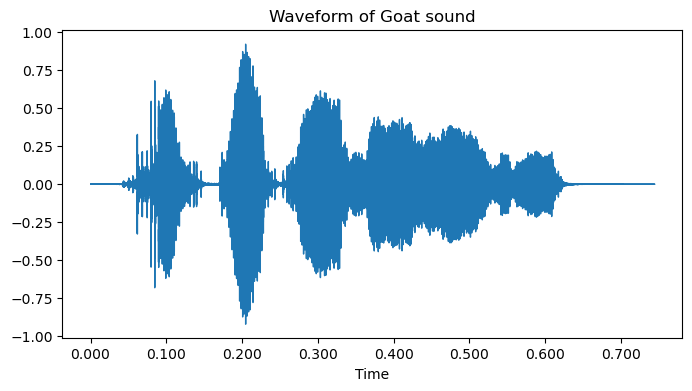

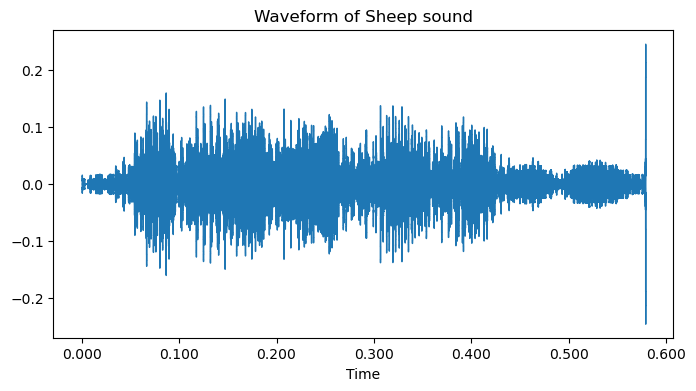

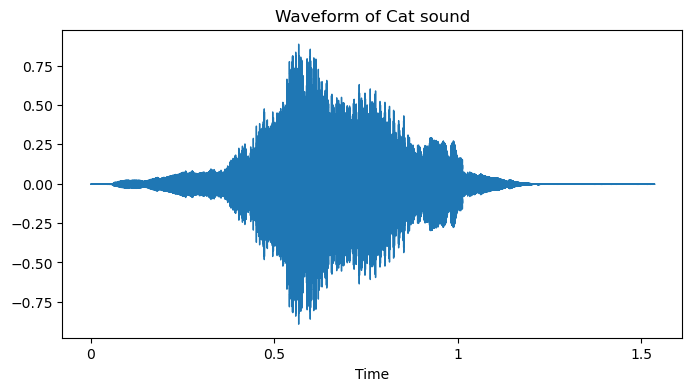

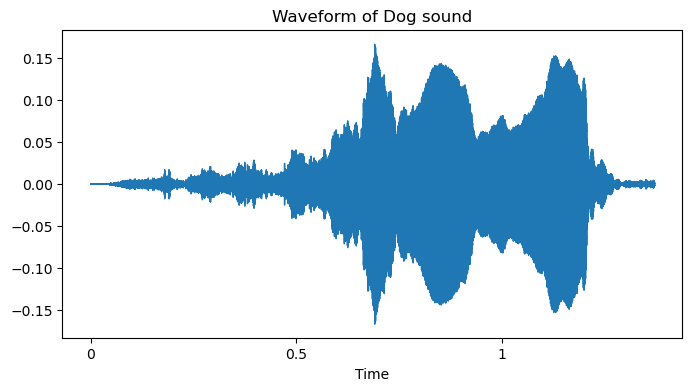

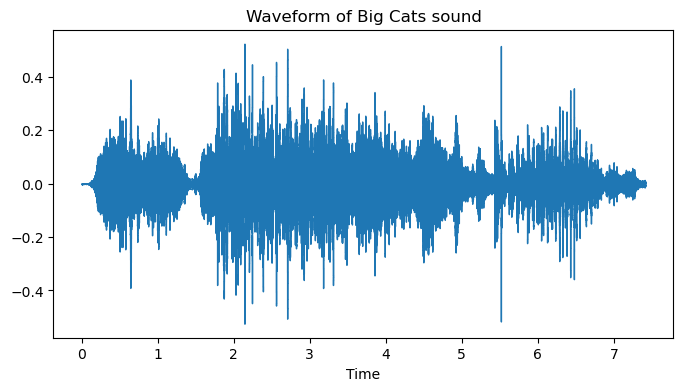

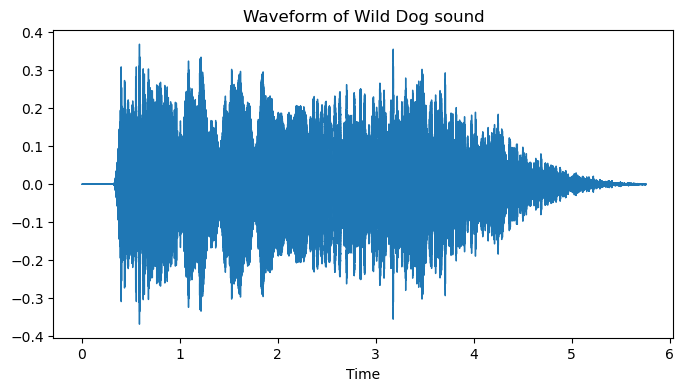

In [5]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

# Base path where the three subfolders are located
base_path = 'C:/Users/91630/OneDrive/Documents/ML Group Project/Sounds/Sounds'

# List of main categories
main_categories = ['Farm Animals', 'Household Pets', 'Wild Animals']

for main_cat in main_categories:
    main_cat_path = os.path.join(base_path, main_cat)
    
    # List of sub-categories within each main category
    sub_categories = os.listdir(main_cat_path)
    
    for sub_cat in sub_categories:
        sub_cat_path = os.path.join(main_cat_path, sub_cat)
        
        
        for file in os.listdir(sub_cat_path):
            if file.endswith('.wav'):
                file_path = os.path.join(sub_cat_path, file)
                
               
                data, sample_rate = librosa.load(file_path)
                
               
                plt.figure(figsize=(8, 4))
                librosa.display.waveshow(data, sr=sample_rate)
                plt.title(f'Waveform of {sub_cat} sound')
                plt.show()
                
                display(Audio(data, rate=sample_rate))
                
                break


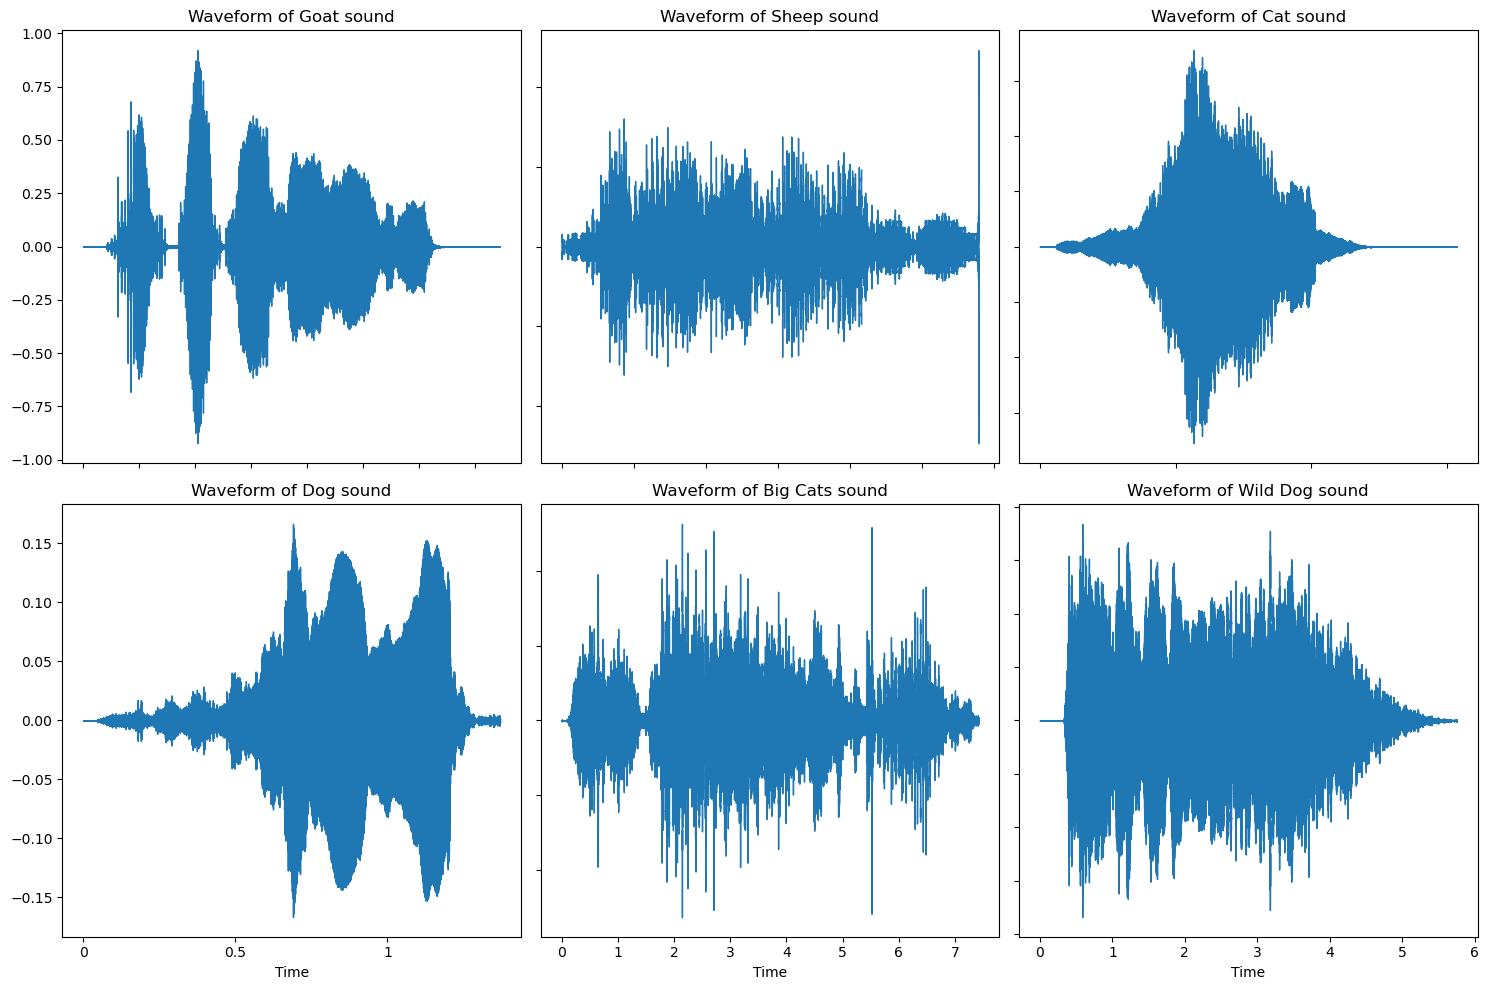

In [6]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt


base_path = 'C:/Users/91630/OneDrive/Documents/ML Group Project/Sounds/Sounds'

main_categories = ['Farm Animals', 'Household Pets', 'Wild Animals']


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten() # Flatten the array to easily iterate over it


current_plot = 0

for main_cat in main_categories:
    main_cat_path = os.path.join(base_path, main_cat)
    
    
    sub_categories = os.listdir(main_cat_path)
    
    for sub_cat in sub_categories:
        sub_cat_path = os.path.join(main_cat_path, sub_cat)
        
        # Processing the first audio file in each sub-category
        for file in os.listdir(sub_cat_path):
            if file.endswith('.wav'):
                file_path = os.path.join(sub_cat_path, file)
                
                
                data, sample_rate = librosa.load(file_path)
                
                
                ax = axes[current_plot]
                librosa.display.waveshow(data, sr=sample_rate, ax=ax)
                ax.set_title(f'Waveform of {sub_cat} sound')
                ax.label_outer()  
                
                current_plot += 1 
                break


plt.tight_layout()
plt.show()


In [1]:
import os
import librosa

base_path = 'C:/Users/91630/OneDrive/Documents/ML Group Project/Sounds/Sounds'


def process_audio_files(directory):
    audio_data = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.wav'):
                file_path = os.path.join(root, file)
               
                audio, sr = librosa.load(file_path, sr=None)  
                duration = librosa.get_duration(y=audio, sr=sr)  
               
                audio_data.append({
                    'file_path': file_path,
                    'sampling_rate': sr,
                    'duration': duration,
                    'category': os.path.basename(root) 
                })
    return audio_data


all_audio_data = process_audio_files(base_path)
all_audio_data[:5]


[{'file_path': 'C:/Users/91630/OneDrive/Documents/ML Group Project/Sounds/Sounds\\Farm Animals\\Goat\\Goat 1.wav',
  'sampling_rate': 48000,
  'duration': 0.744,
  'category': 'Goat'},
 {'file_path': 'C:/Users/91630/OneDrive/Documents/ML Group Project/Sounds/Sounds\\Farm Animals\\Goat\\Goat 10.wav',
  'sampling_rate': 48000,
  'duration': 0.936,
  'category': 'Goat'},
 {'file_path': 'C:/Users/91630/OneDrive/Documents/ML Group Project/Sounds/Sounds\\Farm Animals\\Goat\\Goat 11.wav',
  'sampling_rate': 48000,
  'duration': 0.8502083333333333,
  'category': 'Goat'},
 {'file_path': 'C:/Users/91630/OneDrive/Documents/ML Group Project/Sounds/Sounds\\Farm Animals\\Goat\\Goat 12.wav',
  'sampling_rate': 48000,
  'duration': 0.7605625,
  'category': 'Goat'},
 {'file_path': 'C:/Users/91630/OneDrive/Documents/ML Group Project/Sounds/Sounds\\Farm Animals\\Goat\\Goat 13.wav',
  'sampling_rate': 48000,
  'duration': 1.9903125,
  'category': 'Goat'}]

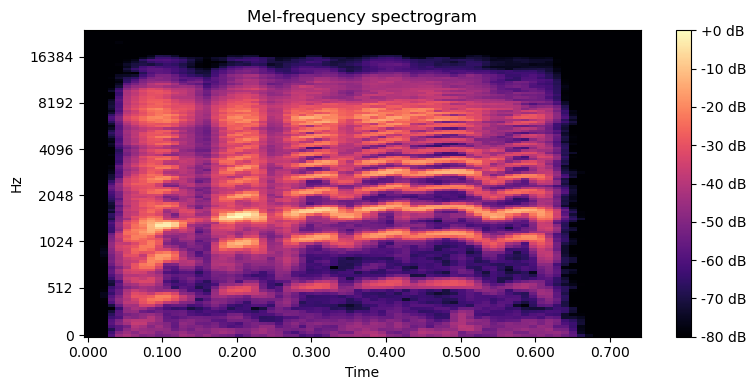

In [2]:
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

def generate_spectrogram(file_path, sr=None):
   
    audio, sr = librosa.load(file_path, sr=sr)
    
    S = librosa.feature.melspectrogram(y=audio, sr=sr)
    
    S_DB = librosa.power_to_db(S, ref=np.max)
    
    return S_DB, sr

# Let's generate a Mel-spectrogram for the first audio file to visualize it
first_file_path = all_audio_data[0]['file_path']
S_DB, sr = generate_spectrogram(first_file_path)

plt.figure(figsize=(8, 4))
librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()


C:\Users\91630\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


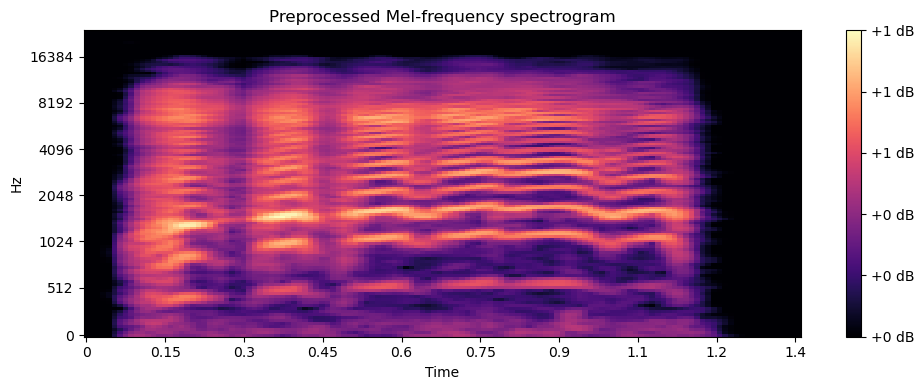

In [3]:
import librosa.display
import numpy as np
from skimage.transform import resize

def preprocess_spectrogram(S_DB, desired_size=(128, 128)):
    # Resize the spectrogram to the desired size
    S_resized = resize(S_DB, desired_size)
    
    # Normalize the pixel values to be between 0 and 1
    S_normalized = (S_resized - np.min(S_resized)) / (np.max(S_resized) - np.min(S_resized))
    
    return S_normalized

preprocessed_S = preprocess_spectrogram(S_DB)

# We'll now visualize the preprocessed spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(preprocessed_S, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Preprocessed Mel-frequency spectrogram')
plt.tight_layout()
plt.show()


In [4]:
import os
import librosa
import numpy as np
from skimage.transform import resize

# Function to preprocess a spectrogram
def preprocess_spectrogram(S_DB, desired_size=(128, 128)):
    # Resize the spectrogram to the desired size
    S_resized = resize(S_DB, desired_size)
    
    
    S_normalized = (S_resized - np.min(S_resized)) / (np.max(S_resized) - np.min(S_resized))
    
    return S_normalized

# Function to process a batch of audio files
def batch_process_audios(audio_data, desired_size=(128, 128)):
    # Initialize arrays for storing spectrograms and labels
    X = []  # Spectrograms
    y = []  # Corresponding labels

    for entry in audio_data:
        file_path = entry['file_path']
        label = entry['category']
        audio, sr = librosa.load(file_path, sr=None)
        S = librosa.feature.melspectrogram(y=audio, sr=sr)
        S_DB = librosa.power_to_db(S, ref=np.max)

       
        S_preprocessed = preprocess_spectrogram(S_DB, desired_size=desired_size)
        X.append(S_preprocessed)
        y.append(label)

        print(f'Processed {file_path}')

    # Convert the lists to NumPy arrays
    X = np.array(X)
    y = np.array(y)

    return X, y


X, y = batch_process_audios(all_audio_data)



Processed C:/Users/91630/OneDrive/Documents/ML Group Project/Sounds/Sounds\Farm Animals\Goat\Goat 1.wav
Processed C:/Users/91630/OneDrive/Documents/ML Group Project/Sounds/Sounds\Farm Animals\Goat\Goat 10.wav
Processed C:/Users/91630/OneDrive/Documents/ML Group Project/Sounds/Sounds\Farm Animals\Goat\Goat 11.wav
Processed C:/Users/91630/OneDrive/Documents/ML Group Project/Sounds/Sounds\Farm Animals\Goat\Goat 12.wav
Processed C:/Users/91630/OneDrive/Documents/ML Group Project/Sounds/Sounds\Farm Animals\Goat\Goat 13.wav
Processed C:/Users/91630/OneDrive/Documents/ML Group Project/Sounds/Sounds\Farm Animals\Goat\Goat 14.wav
Processed C:/Users/91630/OneDrive/Documents/ML Group Project/Sounds/Sounds\Farm Animals\Goat\Goat 15.wav
Processed C:/Users/91630/OneDrive/Documents/ML Group Project/Sounds/Sounds\Farm Animals\Goat\Goat 16.wav
Processed C:/Users/91630/OneDrive/Documents/ML Group Project/Sounds/Sounds\Farm Animals\Goat\Goat 17.wav
Processed C:/Users/91630/OneDrive/Documents/ML Group Pro

Processed C:/Users/91630/OneDrive/Documents/ML Group Project/Sounds/Sounds\Wild Animals\Big Cats\Big cat 1.wav
Processed C:/Users/91630/OneDrive/Documents/ML Group Project/Sounds/Sounds\Wild Animals\Big Cats\Big cat 10.wav
Processed C:/Users/91630/OneDrive/Documents/ML Group Project/Sounds/Sounds\Wild Animals\Big Cats\Big cat 11.wav
Processed C:/Users/91630/OneDrive/Documents/ML Group Project/Sounds/Sounds\Wild Animals\Big Cats\Big cat 12.wav
Processed C:/Users/91630/OneDrive/Documents/ML Group Project/Sounds/Sounds\Wild Animals\Big Cats\Big cat 13.wav
Processed C:/Users/91630/OneDrive/Documents/ML Group Project/Sounds/Sounds\Wild Animals\Big Cats\Big cat 14.wav
Processed C:/Users/91630/OneDrive/Documents/ML Group Project/Sounds/Sounds\Wild Animals\Big Cats\Big cat 15.wav
Processed C:/Users/91630/OneDrive/Documents/ML Group Project/Sounds/Sounds\Wild Animals\Big Cats\Big cat 16.wav
Processed C:/Users/91630/OneDrive/Documents/ML Group Project/Sounds/Sounds\Wild Animals\Big Cats\Big cat 

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# Encoding
lb = LabelBinarizer()
y_encoded = lb.fit_transform(y)

# First, split into a larger train set and a temporary test set
X_temp, X_test, y_temp, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Now split the larger train set into a smaller train set and a validation set
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42) 

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 94 samples
Validation set size: 32 samples
Test set size: 32 samples


In [ ]:
pip install tensorflow


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam


input_shape = (128, 128, 1) 

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# this converts our 3D feature maps to 1D feature vectors
model.add(Flatten())  
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(len(lb.classes_)))  
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Train the model
history= model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))
history

In [6]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

input_shape = (128, 128, 1)

# Define the K-fold Cross Validator
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, val in kfold.split(X, y_encoded):

    # Define the model architecture
    model = Sequential([
        Conv2D(32, (3, 3), input_shape=input_shape),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(64),
        Activation('relu'),
        Dropout(0.5),
        Dense(len(lb.classes_)),
        Activation('softmax')
    ])

    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    # Train the model
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    
    history = model.fit(X[train], y_encoded[train],
                        batch_size=32,
                        epochs=10,
                        validation_data=(X[val], y_encoded[val]))
    
    # Increase fold number
    fold_no = fold_no + 1


C:\Users\91630\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 299ms/step - accuracy: 0.2589 - loss: 1.8213 - val_accuracy: 0.3125 - val_loss: 1.7397
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - accuracy: 0.2573 - loss: 1.7385 - val_accuracy: 0.2812 - val_loss: 1.6595
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.4131 - loss: 1.5951 - val_accuracy: 0.4375 - val_loss: 1.4296
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.4458 - loss: 1.4478 - val_accuracy: 0.6250 - val_loss: 1.1971
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 0.5577 - loss: 1.1800 - val_accuracy: 0.5000 - val_loss: 1.0832
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 0.7043 - loss: 0.9934 - val_accuracy: 0.5938 - val_loss: 0.9785
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.5736 - loss: 1.1334 - val_accuracy: 0.5938 - val_loss: 0.9766
Epoch 8/10
4/4 ━━━━━━

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# model architecture
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(128, 128, 1)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64),
    Activation('relu'),
    Dropout(0.5),
    Dense(len(lb.classes_)), 
    Activation('softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_val, y_val))

history





Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 324ms/step - accuracy: 0.1476 - loss: 1.8454 - val_accuracy: 0.3125 - val_loss: 1.7897
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.3708 - loss: 1.7044 - val_accuracy: 0.3438 - val_loss: 1.7787
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - accuracy: 0.2331 - loss: 1.7118 - val_accuracy: 0.2188 - val_loss: 1.7569
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 0.4053 - loss: 1.6163 - val_accuracy: 0.3438 - val_loss: 1.6330
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - accuracy: 0.4070 - loss: 1.5375 - val_accuracy: 0.3438 - val_loss: 1.5718
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - accuracy: 0.4879 - loss: 1.4181 - val_accuracy: 0.4375 - val_loss: 1.4005
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.5880 - loss: 1.1892 - val_accuracy: 0.5312 - val_loss: 1.2246
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - accuracy: 0.7232 - loss: 0.9034 - val_accuracy: 0.4375 - val_loss:

NameError: name 'best_training_accuracy' is not defined

In [17]:
# Get the best training accuracy
best_training_accuracy = max(history.history['accuracy'])
print(f'Best training accuracy: {best_training_accuracy * 100:.2f}%')

# Find the epoch at which the best training accuracy was achieved
best_epoch = np.argmax(history.history['accuracy']) + 1  
print(f'Best training accuracy was {best_training_accuracy * 100:.2f}% at epoch {best_epoch}')

Best training accuracy: 98.94%
Best training accuracy was 98.94% at epoch 49


In [8]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.8750 - loss: 0.5550
Test loss: 0.5549786686897278
Test accuracy: 0.875


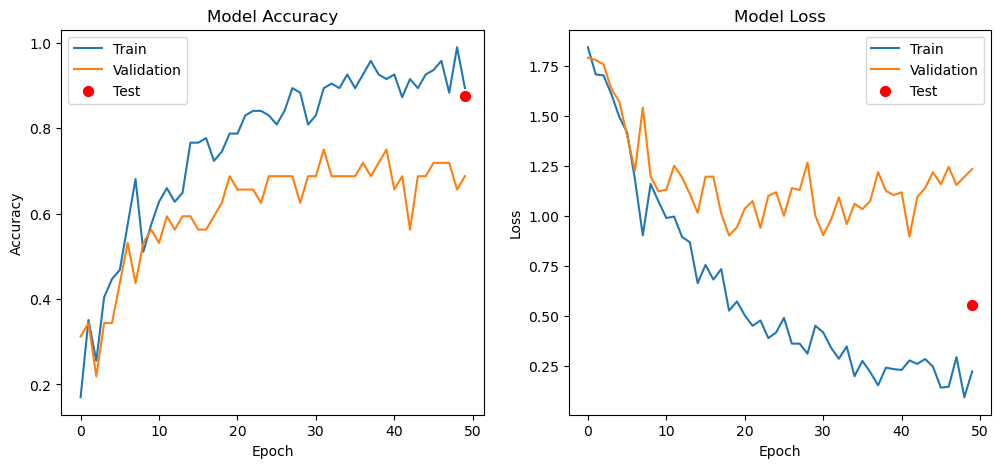

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.scatter(len(history.history['accuracy']) - 1, test_accuracy, label='Test', color='red', marker='.', s=200)  # Test point
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.scatter(len(history.history['loss']) - 1, test_loss, label='Test', color='red', marker='.', s=200)  # Test point
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Test'], loc='upper right')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


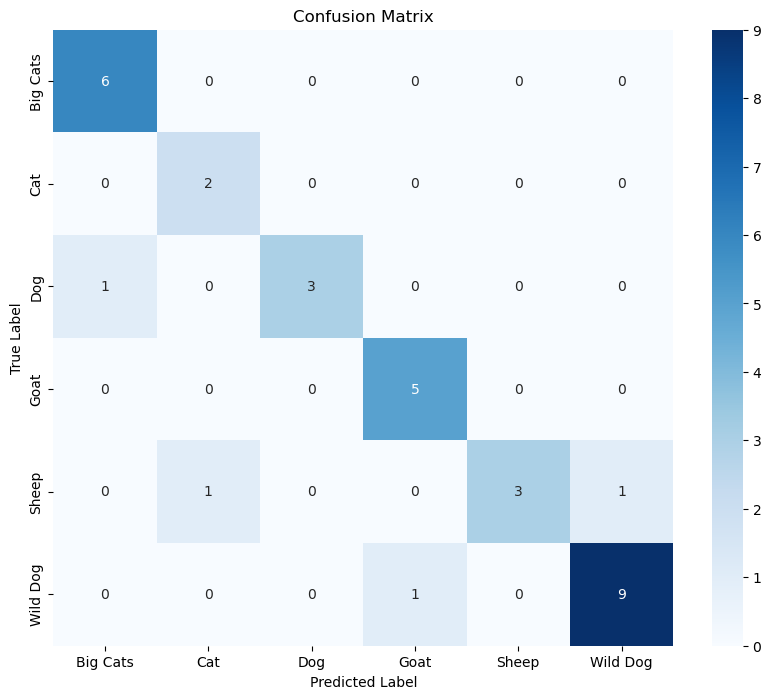

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the classes on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  
y_true = np.argmax(y_test, axis=1) 

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
